## Merve TUTAR 1901022050

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fftshift

In [2]:
def mypgmread(filename):
    
    with open(filename, 'rb') as f:
        
        # Dosyanın ilk iki baytınının "P5" olup olmadığını kontrol et
        magic_number = f.readline().decode('ascii').strip()
        assert magic_number == 'P5', 'Invalid PGM'

        
        while True:
            #Dosyadan bir satır oku, ASCII karakterlere çevir, başındaki ve sonundaki boşlukları temizle
            line = f.readline().decode('ascii').strip()
            if not line.startswith('#'):# Yorum satırlarını atla
                break

        # Genişlik, yükseklik ve maksimum değeri oku
        
        width, height = map(int, line.split()) #line adındaki stringi boşluk karakterlerine göre ayırır bu ayrılmış liste üzerinde int fonksiyonunu her bir elemana uygula
        maxval = int(f.readline().decode('ascii').strip())

        image_data = []#Görüntü verisini depolamak için liste oluştur
        
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = ord(f.read(1))#Dosyadan bir bayt oku ve ASCII değere dönüştür
                row.append(pixel_value)
            image_data.append(row)

        return image_data, width, height, maxval

## Figure 4.24

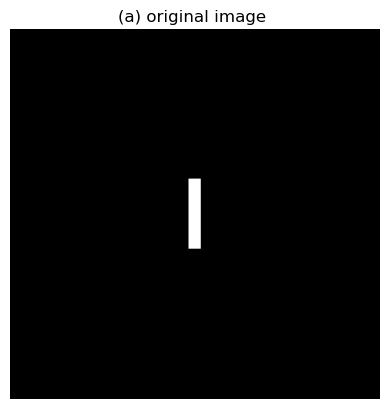

In [12]:
image_data, width, height, maxval = mypgmread('Fig0424(a)(rectangle).pgm')
plt.title("(a) original image ")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()


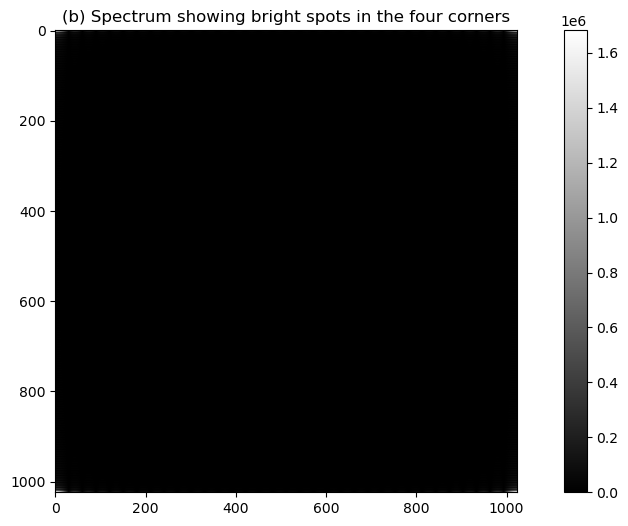

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def my2Dfft(image_data):
    # Satırlara tek boyutlu Fourier dönüşümü uygula
    rows = np.fft.fft(image_data, axis=1)
    
    # Sütunlara tek boyutlu Fourier dönüşümü uygula
    columns = np.fft.fft(rows, axis=0)
    
    return columns

image_data, width, height, maxval = mypgmread('Fig0424(a)(rectangle).pgm')

# 2D FFT al
fft_image_data = my2Dfft(image_data)

# 2D Fourier dönüşüm sonuçlarını görselleştir
plt.figure(figsize=(12,6))
plt.imshow(np.abs(fft_image_data), cmap='gray')# 2D Fourier dönüşüm sonucu 
plt.title("(b) Spectrum showing bright spots in the four corners")
plt.colorbar()
plt.show()


    Figure 4.24(b)'de spektrumun dört köşesinin de benzer şekilde aydınlık olduğu görülmektedir. F(0,0) dönüşümün D.C. noktasını temsil eder. Görüntünün D.C. noktası sol üsttedir. Bu noktanın etrafındaki değerler en yüksek değerleri alır bu sebeple aydınlıktır.

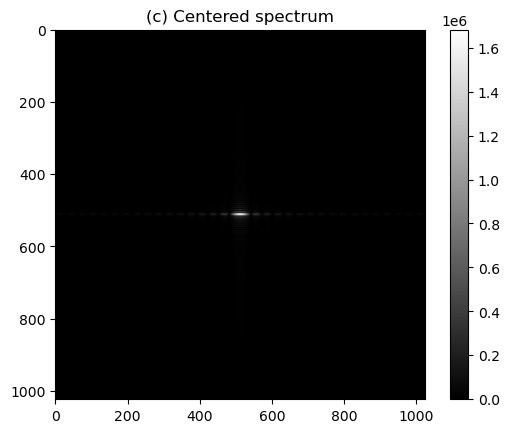

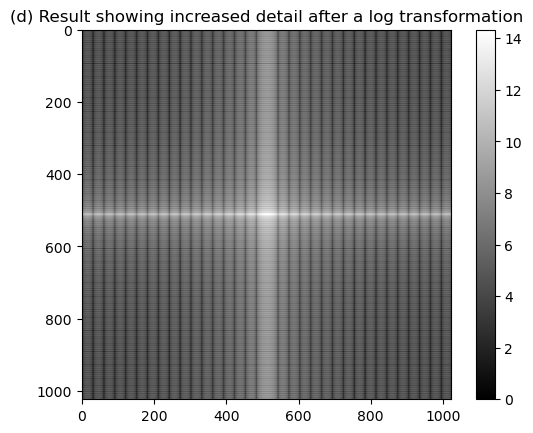

In [17]:
# (c) 
# DC noktasını kaydırmak için (M/2, N/2) noktasına -1^(x+y) ile çarpılan görüntüyü kullan
centered = image_data * (-1) ** (np.arange(height)[:, None] + np.arange(width)[None, :])
fft__centered = my2Dfft(centered)

# Görüntüleri görselleştir
plt.figure()
plt.imshow(np.abs(fft__centered), cmap='gray')
plt.title("(c) Centered spectrum")
plt.colorbar()

plt.figure()
plt.imshow(np.log(1 + np.abs(fft__centered)), cmap='gray')
plt.title("(d) Result showing increased detail after a log transformation")
plt.colorbar()

plt.show()



Spektrumun D.C. noktasını merkeze kaydırmak için görünütüyü (−1)^(𝑥+𝑦) ile çarptıktan sonra Fourier dönüşümü alınmıştır. Bu görüntü (c) şıkkında elde edilmiş görüntüdür. İşlem sonucu merkezin daha aydınlık olduğu görülmektedir. Figure 4.24(d)  (1 + log F(u,v) ) ifadesini gösterir. Görüntüde detaylar belirgindir.

In [15]:
def my2Difft(data):
    image_data, width, height, maxval = mypgmread(data)
    image_data=np.array(image_data,dtype=np.uint8)
    fft_f= my2Dfft(image_data)
    
    f_conjugate = my2Dfft(np.conj(fft_f)) / (height*width)
    f = np.conj(f_conjugate)
    
    plt.figure()
    plt.imshow(np.abs(f),cmap='gray')
    plt.colorbar()

Text(0.5, 1.0, 'Inverse FFT of the spectrum')

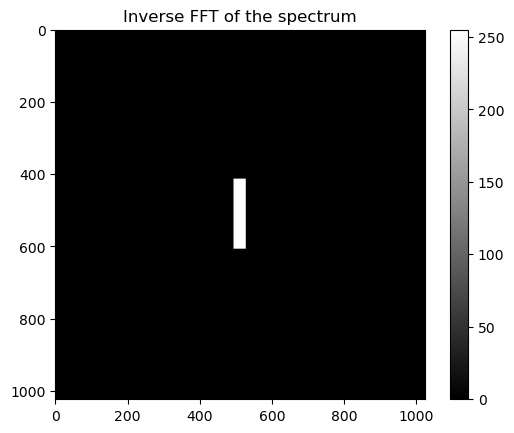

In [16]:
# Inverse FFT
my2Difft('Fig0424(a)(rectangle).pgm')
plt.title('Inverse FFT of the spectrum')

(a) şıkkında kendi yazdığımız my2Dfft() fonksiyonunu kullanarak ters Fourier fonksiyonunu oluşturup, uygulayıp orjinal (a) görüntüsü tekrar elde edilmiştir.